In [1]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
#!pip install -qq google_play_scraper
# !pip install -q transformers
!pip install --upgrade transformers

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [5]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
ibotta = reviews_all('com.yangaplugasap.app', sleep_milliseconds=0, lang='en',country='NG', sort=Sort.NEWEST)

In [6]:
ibotta

[{'reviewId': '4e25bd1d-6078-439d-8feb-5a34266881f2',
  'userName': 'Daniel akinyede',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjWVwaLjKKa3xqSiRUW1SvP-_KKnnqa_ZBpVkviWykCgjoBM2TM',
  'content': "My first time of buying on this app, I did 7GB and I have a data before initialally I have used more than 100 MB just to check by data balance from the one I bought on this app telling me I have used 300mb out of 7GB and the data usage of my phone is 210mb then I realized that it is a bonus data that doesn't last long. So the owner of this app is a thief",
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.11.0',
  'at': datetime.datetime(2024, 12, 29, 16, 5, 36),
  'replyContent': "Dear User,\nWe apologize for this experience. Please bear in mind that the data is been delivered by the network, duration depends on your usage, kindly confirm you don't have background apps updating or running. Thank you.",
  'repliedAt': datetime.datetime(2024, 12, 30, 16, 39, 5

In [7]:
# convert the json data into a dataframe
ibotta_df = pd.json_normalize(ibotta)

In [8]:
ibotta_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4e25bd1d-6078-439d-8feb-5a34266881f2,Daniel akinyede,https://play-lh.googleusercontent.com/a-/ALV-U...,"My first time of buying on this app, I did 7GB...",1,0,2.11.0,2024-12-29 16:05:36,"Dear User,\nWe apologize for this experience. ...",2024-12-30 16:39:58,2.11.0
1,bb53c032-6efe-49cd-afb9-60ff2ef22e84,Akpati Annette,https://play-lh.googleusercontent.com/a/ACg8oc...,The app is useless,1,0,2.11.0,2024-12-28 17:13:17,None,NaT,2.11.0
2,430b8948-da73-41f6-a428-6f5aa7443201,Omowonuola Dawodu,https://play-lh.googleusercontent.com/a-/ALV-U...,I credited the yanga account since yesterday a...,1,0,2.11.0,2024-12-28 06:44:29,None,NaT,2.11.0
3,9d31d14a-891e-4baa-9433-d5934d875e11,David Nwabueze,https://play-lh.googleusercontent.com/a/ACg8oc...,Since I used it to buy data I can't use airtim...,1,0,2.0.8,2024-12-27 18:34:06,None,NaT,2.0.8
4,0052381a-f3e8-4e67-a864-b573a37ddae1,Doreen Omero,https://play-lh.googleusercontent.com/a/ACg8oc...,I'm trying to top up electricity bill for some...,1,1,2.11.0,2024-12-27 13:18:09,We regret to note this. Please contact us at y...,2024-12-30 16:40:17,2.11.0


In [9]:
ibotta_df.shape

(1627, 11)

In [10]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = "C:/Users/Maryam Muhammed/Desktop/DSFP/ETL"


c:\Users\Muhammad Nasir\Desktop\DSFP\ETL\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)



Device set to use cpu
Device set to use cpu


In [13]:
#removing wildcharacter and cleaning the content column by casting to a str
ibotta_df['content_new']= ibotta_df['content'].astype('str')

In [14]:
ibotta_df['result'] =ibotta_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [15]:
ibotta_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,4e25bd1d-6078-439d-8feb-5a34266881f2,Daniel akinyede,https://play-lh.googleusercontent.com/a-/ALV-U...,"My first time of buying on this app, I did 7GB...",1,0,2.11.0,2024-12-29 16:05:36,"Dear User,\nWe apologize for this experience. ...",2024-12-30 16:39:58,2.11.0,"My first time of buying on this app, I did 7GB...","[{'label': 'NEGATIVE', 'score': 0.999482750892..."
1,bb53c032-6efe-49cd-afb9-60ff2ef22e84,Akpati Annette,https://play-lh.googleusercontent.com/a/ACg8oc...,The app is useless,1,0,2.11.0,2024-12-28 17:13:17,None,NaT,2.11.0,The app is useless,"[{'label': 'NEGATIVE', 'score': 0.999485254287..."
2,430b8948-da73-41f6-a428-6f5aa7443201,Omowonuola Dawodu,https://play-lh.googleusercontent.com/a-/ALV-U...,I credited the yanga account since yesterday a...,1,0,2.11.0,2024-12-28 06:44:29,None,NaT,2.11.0,I credited the yanga account since yesterday a...,"[{'label': 'NEGATIVE', 'score': 0.998812079429..."
3,9d31d14a-891e-4baa-9433-d5934d875e11,David Nwabueze,https://play-lh.googleusercontent.com/a/ACg8oc...,Since I used it to buy data I can't use airtim...,1,0,2.0.8,2024-12-27 18:34:06,None,NaT,2.0.8,Since I used it to buy data I can't use airtim...,"[{'label': 'NEGATIVE', 'score': 0.999406933784..."
4,0052381a-f3e8-4e67-a864-b573a37ddae1,Doreen Omero,https://play-lh.googleusercontent.com/a/ACg8oc...,I'm trying to top up electricity bill for some...,1,1,2.11.0,2024-12-27 13:18:09,We regret to note this. Please contact us at y...,2024-12-30 16:40:17,2.11.0,I'm trying to top up electricity bill for some...,"[{'label': 'NEGATIVE', 'score': 0.999463498592..."


In [16]:
# spliting the result into sentiment and score
ibotta_df['sentiment'] = ibotta_df['result'].apply(lambda x: (x[0]['label']))
ibotta_df['score'] = ibotta_df['result'].apply(lambda x: (x[0]['score']))

In [17]:
ibotta_df[['content','score','sentiment']]

,content,score,sentiment
0,"My first time of buying on this app, I did 7GB...",0.999483,NEGATIVE
1,The app is useless,0.999485,NEGATIVE
2,I credited the yanga account since yesterday a...,0.998812,NEGATIVE
3,Since I used it to buy data I can't use airtim...,0.999407,NEGATIVE
4,I'm trying to top up electricity bill for some...,0.999463,NEGATIVE
...,...,...,...
1622,Nice app,0.998574,POSITIVE
1623,Very fast and swift.,0.998466,POSITIVE
1624,There is no tasks for me to start earning money.,0.998814,NEGATIVE
1625,I just can't wait for this to be fully ready,0.998788,POSITIVE


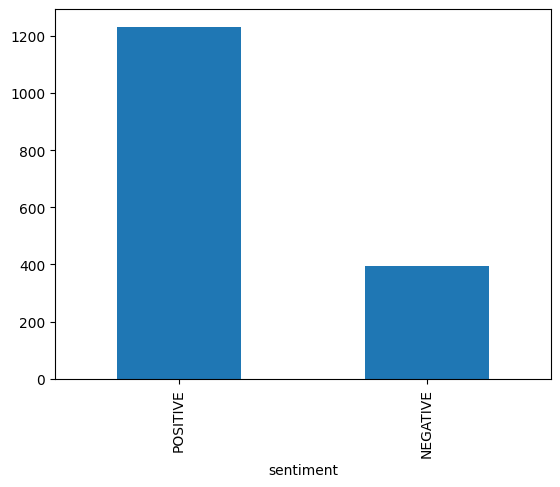

In [18]:
ibotta_df['sentiment'].value_counts().plot(kind='bar');

In [19]:
#generate a series for the reviews
feature_google=ibotta_df['content']
print(feature_google.size)
feature_google.head()

1627


0    My first time of buying on this app, I did 7GB...
1                                   The app is useless
2    I credited the yanga account since yesterday a...
3    Since I used it to buy data I can't use airtim...
4    I'm trying to top up electricity bill for some...
Name: content, dtype: object

In [25]:
pip install bertopic

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Import the necessary libraries
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())


0    My first time of buying on this app, I did 7GB...
1                                   The app is useless
2    I credited the yanga account since yesterday a...
3    Since I used it to buy data I can't use airtim...
4    I'm trying to top up electricity bill for some...
Name: content, dtype: object


In [27]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.
                                   astype(str))

In [28]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,246,-1_the_this_it_you,"[the, this, it, you, and, app, to, for, is, will]",[I regret downloading this app. I have 8 trans...
1,0,228,0_app_nice_very_love,"[app, nice, very, love, good, amazing, is, eas...",[Its has been a very good app and very easy to...
2,1,218,1_yangaplug_yanga_is_plug,"[yangaplug, yanga, is, plug, and, to, the, for...","[Yangaplug ,the best, Yangaplug is the best, Y..."
3,2,111,2_my_money_wallet_this,"[my, money, wallet, this, account, scam, not, ...",[I will say your services are bad and I am not...
4,3,71,3_login_otp_sign_to,"[login, otp, sign, to, create, code, cant, som...",[I'm trying to create account and it's telling...
5,4,71,4_data_my_bought_was,"[data, my, bought, was, but, not, to, this, th...","[I really don't understand, I downloaded this ..."
6,5,66,5_earn_money_make_earning,"[earn, money, make, earning, making, app, inco...","[Very nice app you can earn money, ""I'm loving..."
7,6,51,6_data_cheap_affordable_best,"[data, cheap, affordable, best, and, really, c...",[A very wonderful app and you can also buy ver...
8,7,49,7_nice_app_application_working,"[nice, app, application, working, perfectly, r...","[Nice app, Nice App, Nice app]"
9,8,46,8_best_ever_app_seen,"[best, ever, app, seen, the, this, is, across,...","[the best app ever, This is the best app ever,..."


In [29]:
ibotta_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'content_new', 'result', 'sentiment'],
      dtype='object')

In [30]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
ibotta_df.to_excel(output_file, index=False)

In [31]:
!pip install mysql-connector-python --upgrade

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/54/15/98d703a1101e0bfb106e4085f41f937ddca869d16746c076fb818b6f883d/mysql_connector_python-9.1.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB 330.3 kB/s eta 0:00:49
   ---------------------------------------- 0.0/16.1 MB 262.6 kB/s eta 0:01:02
   ---------------------------------------- 0.0/16.1 MB 217.9 kB/s eta 0:01:14
   ---------------------------------------- 0.1/16.1 MB 272.3 kB/s eta 0:00:59
   ---------------------------------------- 0.1/16.1 MB 348.6 kB/s eta 0:00:46
   ---------------------------------------- 0.1/16.1 MB 400.9 kB/s eta 0:00:40
   ---------------------------------------- 0.2/16.1 MB 416.7 kB/s eta 0:00:39
    --------------------------------------- 0.2/16.1 MB 497.6 kB/s et

In [32]:
dataframe=ibotta_df

In [33]:

data = [tuple(row) for row in ibotta_df.to_numpy()]

In [34]:
#  Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")

Column 'result' contains list values.


In [35]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )

In [36]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [37]:
!pip install ipywidgets
!pip install mysql-connector-python --upgrade

ERROR: Invalid requirement: 'mysql-connector-python\xa0--upgrade'


In [38]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [39]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': '',#your password
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """

    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Database 'playstore_reviews' does not exist. Creating it...
Database 'playstore_reviews' created successfully!
Table `playstore_reviews` created successfully!
1627 rows inserted/updated successfully!
MySQL connection closed.


In [ ]:
df = pd.read_excel('playstore_reviews.xlsx')